<a href="https://colab.research.google.com/github/Karti1313/DataScience_projects/blob/main/Delhivery_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as spy

In [113]:
!gdown 1xnWDDWTJ2vnHOGp6fahGBe1-8zX2lall

Downloading...
From: https://drive.google.com/uc?id=1xnWDDWTJ2vnHOGp6fahGBe1-8zX2lall
To: /content/delhivery_data.txt
100% 55.6M/55.6M [00:00<00:00, 178MB/s]


In [114]:
#Loading of csv file
df=pd.read_csv("/content/delhivery_data.txt")

In [115]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [117]:
#creating copy of data frame

df1=df

In [118]:
#dropping unknown fields-is_cutoff,cutoff_factor,cutoff_timestamp,factor,segment_factor

unknown=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor']
df1=df1.drop(columns=unknown)

**Time period of given data**

In [119]:
df1['trip_creation_time'].min(),df1['od_end_time'].max()

('2018-09-12 00:00:16.535741', '2018-10-08 03:00:24.353479')

**Converting data types of required column**

In [120]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
data,144867,2,training,104858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_type,144867,2,FTL,99660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_uuid,144867,14817,trip-153811219535896559,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_center,144867,1508,IND000000ACB,23347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_center,144867,1481,IND000000ACB,15192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN


since data and route_type has only two unique values, converting it into datatype category

In [121]:
df1['data']=df1['data'].astype('category')
df1['route_type']=df1['route_type'].astype('category')

converting all numerical columns to float32 as max values is adequate enough with float data type, it reduces memory

In [122]:
num_cols =['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']

In [123]:
df1[num_cols]=df1[num_cols].astype('float32')

updating data type of data & time column

In [124]:
date_time=['trip_creation_time','od_start_time','od_end_time']

In [125]:
for i in date_time:
  df1[i]=pd.to_datetime(df1[i])

In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

memory usage reduced from 25+ to 14+MB

**Handling Missing values**

In [127]:
df1.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [128]:
missing_source_name =df1.loc[df1['source_name'].isnull(),'source_center'].unique()
missing_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [129]:
for i in missing_source_name:
  unique_source_name=df1.loc[df1['source_center']==i,'source_name'].unique()
  if pd.isna(unique_source_name):
    print("Source name :",i,"Source_centre :", 'Not found')
  else:
    print("Source name :",i,"Source_centre :",unique_source_name )


Source name : IND342902A1B Source_centre : Not found
Source name : IND577116AAA Source_centre : Not found
Source name : IND282002AAD Source_centre : Not found
Source name : IND465333A1B Source_centre : Not found
Source name : IND841301AAC Source_centre : Not found
Source name : IND509103AAC Source_centre : Not found
Source name : IND126116AAA Source_centre : Not found
Source name : IND331022A1B Source_centre : Not found
Source name : IND505326AAB Source_centre : Not found
Source name : IND852118A1B Source_centre : Not found


In [130]:
missing_dest_name=df1.loc[df1['destination_name'].isnull(),'destination_center'].unique()
missing_dest_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [131]:
for i in missing_dest_name:
  unique_dest_name=df1.loc[df1['destination_center']==i,'destination_name'].unique()
  if pd.isna(unique_dest_name):
    print("Destination name :",i,"Destination_centre :", 'Not found')
  else:
    print("Destination name :",i,"Destination_centre :",unique_dest_name )

Destination name : IND342902A1B Destination_centre : Not found
Destination name : IND577116AAA Destination_centre : Not found
Destination name : IND282002AAD Destination_centre : Not found
Destination name : IND465333A1B Destination_centre : Not found
Destination name : IND841301AAC Destination_centre : Not found
Destination name : IND505326AAB Destination_centre : Not found
Destination name : IND852118A1B Destination_centre : Not found
Destination name : IND126116AAA Destination_centre : Not found
Destination name : IND509103AAC Destination_centre : Not found
Destination name : IND221005A1A Destination_centre : Not found
Destination name : IND250002AAC Destination_centre : Not found
Destination name : IND331001A1C Destination_centre : Not found
Destination name : IND122015AAC Destination_centre : Not found


since missing values not found in its corresponding ids & count of missing value is very less proceeding to drop those rows

In [132]:
df1.drop(df[df1['source_name'].isna() | df['destination_name'].isna()].index , inplace=True)

In [133]:
df1.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


Merging of Rows and Aggregation

Since delivery details of one package is divided into several rows
Merging rows on the basis of Trip_uuid, Source ID and Destination
Further aggregate on the basis of just Trip_uuid

In [134]:
# step 1: creating segment key
df1['segment_key']=df['trip_uuid']+'-'+df['source_center']+'-'+df['destination_center']

#step 2: Merging rows based on segment key
df1['segment_actual_time_sum']=df1.groupby('segment_key')['segment_actual_time'].cumsum()
df1['segment_osrm_distance_sum']=df1.groupby('segment_key')['segment_osrm_distance'].cumsum()
df1['segment_osrm_time_sum']=df1.groupby('segment_key')['segment_osrm_time'].cumsum()


In [135]:
df1.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.965300,14.0,11.0,11.9653,trip-153741093647649320-IND388121AAA-IND388620AAB,14.0,11.965300,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,24.0,20.0,21.724300,10.0,9.0,9.7590,trip-153741093647649320-IND388121AAA-IND388620AAB,24.0,21.724300,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40.0,28.0,32.539501,16.0,7.0,10.8152,trip-153741093647649320-IND388121AAA-IND388620AAB,40.0,32.539497,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,62.0,40.0,45.562000,21.0,12.0,13.0224,trip-153741093647649320-IND388121AAA-IND388620AAB,61.0,45.561897,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68.0,44.0,54.218102,6.0,5.0,3.9153,trip-153741093647649320-IND388121AAA-IND388620AAB,67.0,49.477200,44.0


In [136]:

# Step 3: Define aggregation dictionary create_segment_dict
create_segment_dict = {
    'data': 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'trip_uuid': 'first',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'last',
    'destination_name': 'last',
    'od_start_time': 'first',
    'od_end_time': 'first',
    'start_scan_to_end_scan': 'first',
    'actual_distance_to_destination': 'last',
    'actual_time': 'last',
    'osrm_time': 'last',
    'osrm_distance': 'last',
    'segment_actual_time_sum': 'last',
    'segment_osrm_distance_sum': 'last',
    'segment_osrm_time_sum': 'last'
}

In [137]:
# Step 4: Sort the DataFrame by segment_key and od_end_time
df_sorted = df1.sort_values(by=['segment_key', 'od_end_time'], ascending=[True, True])

In [138]:

# Step 5: Group by segment_key and apply aggregation functions
df2 = df_sorted.groupby('segment_key').agg(create_segment_dict).reset_index()

In [139]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26222 non-null  object        
 1   data                            26222 non-null  category      
 2   trip_creation_time              26222 non-null  datetime64[ns]
 3   route_schedule_uuid             26222 non-null  object        
 4   route_type                      26222 non-null  category      
 5   trip_uuid                       26222 non-null  object        
 6   source_center                   26222 non-null  object        
 7   source_name                     26222 non-null  object        
 8   destination_center              26222 non-null  object        
 9   destination_name                26222 non-null  object        
 10  od_start_time                   26222 non-null  datetime64[ns]
 11  od

In [140]:
df2 = df2.groupby(by = 'trip_uuid', as_index = False).agg(create_segment_dict)

**Feature Engineering**

Calculate time taken between od_start_time and od_end_time and keep it as a feature named od_time_diff_hour. Dropping the original columns.

In [141]:
df2['od_total_time']=df2['od_end_time']-df2['od_start_time']
df2.drop(columns=['od_start_time','od_end_time'],inplace=True)
df2['od_total_time']=df2['od_total_time'].apply(lambda x: round(x.total_seconds()/60,2))
df2['od_total_time'].head()


,od_total_time
0,1260.60
1,58.83
2,834.64
3,100.49
4,152.01


In [142]:
def source_name_to_state(x):
  l=x.split('(')
  if len(l)==1:
    return l[0]
  else:
    return l[1].replace(')',"")

In [143]:
def source_name_to_city(x):
  l=x.split()[0].split('_')
  if 'CCU' in x:
    return 'Kolkata'
  elif 'MAA' in x.upper():
    return 'Chennai'
  elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
    return 'Bengaluru'
  elif 'FBD' in x.upper():
    return 'Faridabad'
  elif 'BOM' in x.upper():
    return 'Mumbai'
  elif 'DEL' in x.upper():
    return 'Delhi'
  elif 'OK' in x.upper():
    return 'Delhi'
  elif 'GZB' in x.upper():
    return 'Ghaziabad'
  elif 'GGN' in x.upper():
    return 'Gurgaon'
  elif 'AMD' in x.upper():
    return 'Ahmedabad'
  elif 'CJB' in x.upper():
    return 'Coimbatore'
  elif 'HYD' in x.upper():
    return 'Hyderabad'
  return l[0]

In [144]:
def source_name_to_place(x):
  l=x.split()[0].split('_',1)
  if len(l)==1:
    return 'unknow_place'
  else:
    return l[1]


In [145]:
df2['source_state']=df2['source_name'].apply(source_name_to_state)
df2['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland'],
      dtype=object)

In [146]:
df2['source_city'] = df2['source_name'].apply(source_name_to_city)
print('No of source cities :', df2['source_city'].nunique())
df2['source_city'].unique()[:100]

No of source cities : 687


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur', 'Madakasira', 'Sonari',
       'Dindigul', 'Jalandhar', 'Chandigarh', 'Deoli', 'Pandharpur',
       'Kolkata', 'Bhandara', 'Kurnool', 'Bhiwandi', 'Bhatinda',
       'RoopNagar', 'Bantwal', 'Lalru', 'Kadi', 'Shahdol', 'Gangakher',
       'Durgapur', 'Vapi', 'Jamjodhpur', 'Jetpur', 'Mehsana', 'Jabalpur',
       'Junagadh', 'Gundlupet', 'Mysore', 'Goa', 'Bhopal', 'Sonipat',
       'Himmatnagar', 'Jamshedpur', 'Pondicherry', 'Anand', 'Udgir',
       'Nadiad', 'Villupuram', 'Purulia', 'Bhubaneshwar', 'Bamangola',
       'Tiruppattur', 'Kotdwara', 'Medak', 'Bangalore', 'Dhrangadhra',
       'Hospet', 'Ghumarwin', 'Agra', 'Sitapur', 'Canacona', 'Bilimora',
       'SultnBthry', 'Lucknow', 'Vellore', 'Bhuj', 'Dinhata',
       'Margheri

In [147]:
df2['source_place'] = df2['source_name'].apply(source_name_to_place)
df2['source_place'].unique()[:100]

array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknow_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'Central_D_12', 'Lajpat_IP',
       'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3', 'Shamshbd_H',
       'Xroad_D', 'Nehrugnj_I', 'Central_I_7', 'Central_H_1', 'Nangli_IP',
       'North', 'KndliDPP_D', 'Central_D_9', 'DavkharRd_D', 'Bandel_D',
       'RTCStand_D', 'Central_DPP_1', 'KGAirprt_HB', 'North_D_2',
       'Central_D_1', 'DC', 'Mthurard_L', 'Mullanpr_DC', 'Central_DPP_2',
       'RajCmplx_D', 'Beliaghata_DPC', 'RjnaiDPP_D', 'AbbasNgr_I',
       'Mankoli_HB', 'DPC', 'Airport_H', 'Hub', 'Gateway_HB',
       'Tathawde_H', 'ChotiHvl_DC', 'Trmltmpl_D', 'OnkarDPP_D',
       'Mehmdpur_H', 'KaranNGR_D', 'Sohagpur_D', 'Chrompet_L',
       'Busstand_D', 'Central_I_1', 'IndEstat_I', 'Court_D', 'Panchot_IP',
       'Adhartal_IP', 'DumDum_DPC', 'Bomsndra_HB', 'Swamylyt_D',
       'Yadvgiri_IP', 'Old', 'Kundli_H', 'Central_I_3', 'Vasanthm_I',
       'Poonamallee_HB', 'VUNagar_DC',

Destination Name: Split and extract features out of destination. City-place-code (State)

In [148]:
df2['destination_state'] = df2['destination_name'].apply(source_name_to_state)
df2['destination_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Madhya Pradesh', 'Assam', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Dadra and Nagar Haveli', 'Orissa',
       'Bihar', 'Jharkhand', 'Goa', 'Uttarakhand', 'Himachal Pradesh',
       'Kerala', 'Arunachal Pradesh', 'Mizoram', 'Chhattisgarh',
       'Jammu & Kashmir', 'Nagaland', 'Meghalaya', 'Tripura',
       'Daman & Diu'], dtype=object)

In [149]:
df2['destination_city'] = df2['destination_name'].apply(source_name_to_city)
df2['destination_city'].head()

,destination_city
0,Kanpur
1,Doddablpur
2,Gurgaon
3,Mumbai
4,Sandur


In [150]:
df2['destination_place'] = df2['destination_name'].apply(source_name_to_place)
df2['destination_place'].head()

,destination_place
0,Central_H_6
1,ChikaDPP_D
2,Bilaspur_HB
3,MiraRd_IP
4,WrdN1DPP_D


Trip_creation_time: Extract features like month, year, day, etc.

In [151]:
df2['trip_creation_date'] = pd.to_datetime(df2['trip_creation_time'].dt.date)
df2['trip_creation_date'].head()

,trip_creation_date
0,2018-09-12
1,2018-09-12
2,2018-09-12
3,2018-09-12
4,2018-09-12


In [152]:
df2['trip_creation_day'] = pd.to_datetime(df2['trip_creation_time'].dt.day)
df2['trip_creation_day'] = df2['trip_creation_day'].astype('int')
df2['trip_creation_day'].head()

,trip_creation_day
0,12
1,12
2,12
3,12
4,12


In [153]:

df2['trip_creation_month'] = df2['trip_creation_time'].dt.month
df2['trip_creation_month'] = df2['trip_creation_month'].astype('int8')
df2['trip_creation_month'].head()

,trip_creation_month
0,9
1,9
2,9
3,9
4,9


In [154]:
df2['trip_creation_year'] = df2['trip_creation_time'].dt.year
df2['trip_creation_year'] = df2['trip_creation_year'].astype('int16')
df2['trip_creation_year'].head()

,trip_creation_year
0,2018
1,2018
2,2018
3,2018
4,2018


In [155]:

df2['trip_creation_week'] = df2['trip_creation_time'].dt.isocalendar().week
df2['trip_creation_week'] = df2['trip_creation_week'].astype('int8')
df2['trip_creation_week'].head()


,trip_creation_week
0,37
1,37
2,37
3,37
4,37


In [156]:

df2['trip_creation_hour'] = df2['trip_creation_time'].dt.hour
df2['trip_creation_hour'] = df2['trip_creation_hour'].astype('int8')
df2['trip_creation_hour']

,trip_creation_hour
0,0
1,0
2,0
3,0
4,0
...,...
14782,23
14783,23
14784,23
14785,23


**Final data after data cleaning**

In [157]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  category      
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  category      
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   start_scan_to_end_scan          14787 non-null  float32       
 10  actual_distance_to_destination  14787 non-null  float32       
 11  ac

In [158]:
df2.describe(include=object).T

,count,unique,top,freq
route_schedule_uuid,14787,1497,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,53
trip_uuid,14787,14787,trip-153671041653548748,1
source_center,14787,930,IND000000ACB,1052
source_name,14787,930,Gurgaon_Bilaspur_HB (Haryana),1052
destination_center,14787,1035,IND000000ACB,821
destination_name,14787,1035,Gurgaon_Bilaspur_HB (Haryana),821
source_state,14787,29,Maharashtra,2714
source_city,14787,687,Mumbai,1442
source_place,14787,754,Bilaspur_HB,1052
destination_state,14787,31,Maharashtra,2561


In-Depth Analysis
Outlier Detection and Treatment


In [159]:
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum',
           'segment_osrm_time_sum', 'od_total_time']

<Axes: >

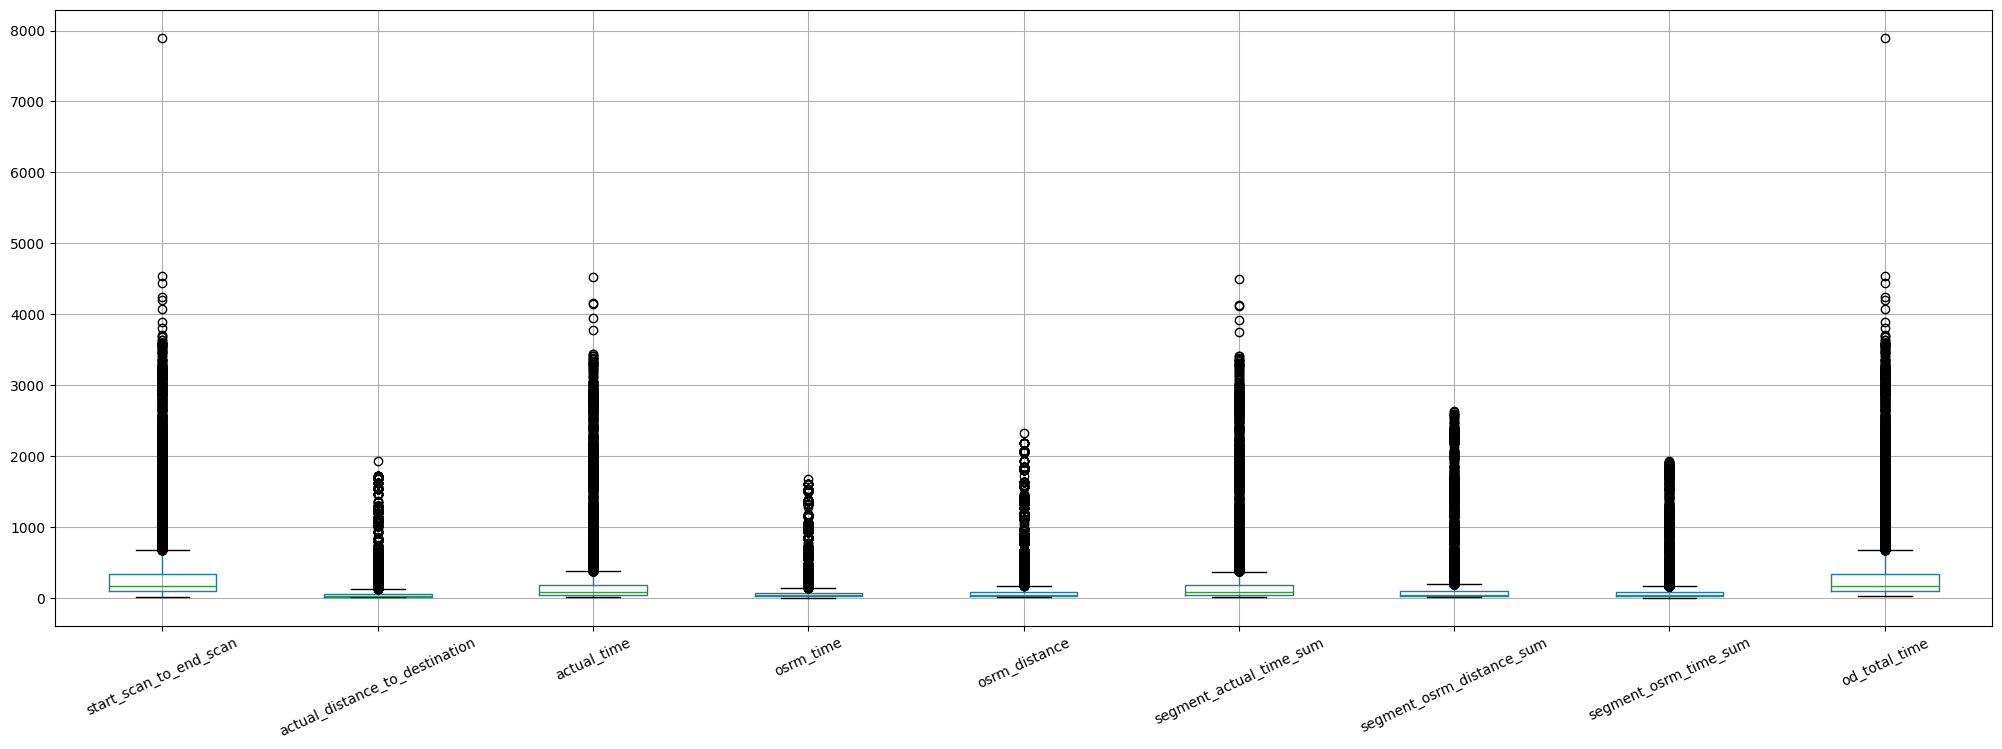

In [160]:
df2[num_cols].boxplot(rot=25, figsize=(25,8))

In [161]:
Q1=df2[num_cols].quantile(0.25)
Q3=df2[num_cols].quantile(0.75)

IQR=Q3-Q1

In [162]:
df2=df2[-((df2[num_cols]<(Q1-1.5*IQR)) | (df2[num_cols]>(Q3+1.5*IQR))).any(axis=1)]
df2=df2.reset_index(drop=True)

<Axes: >

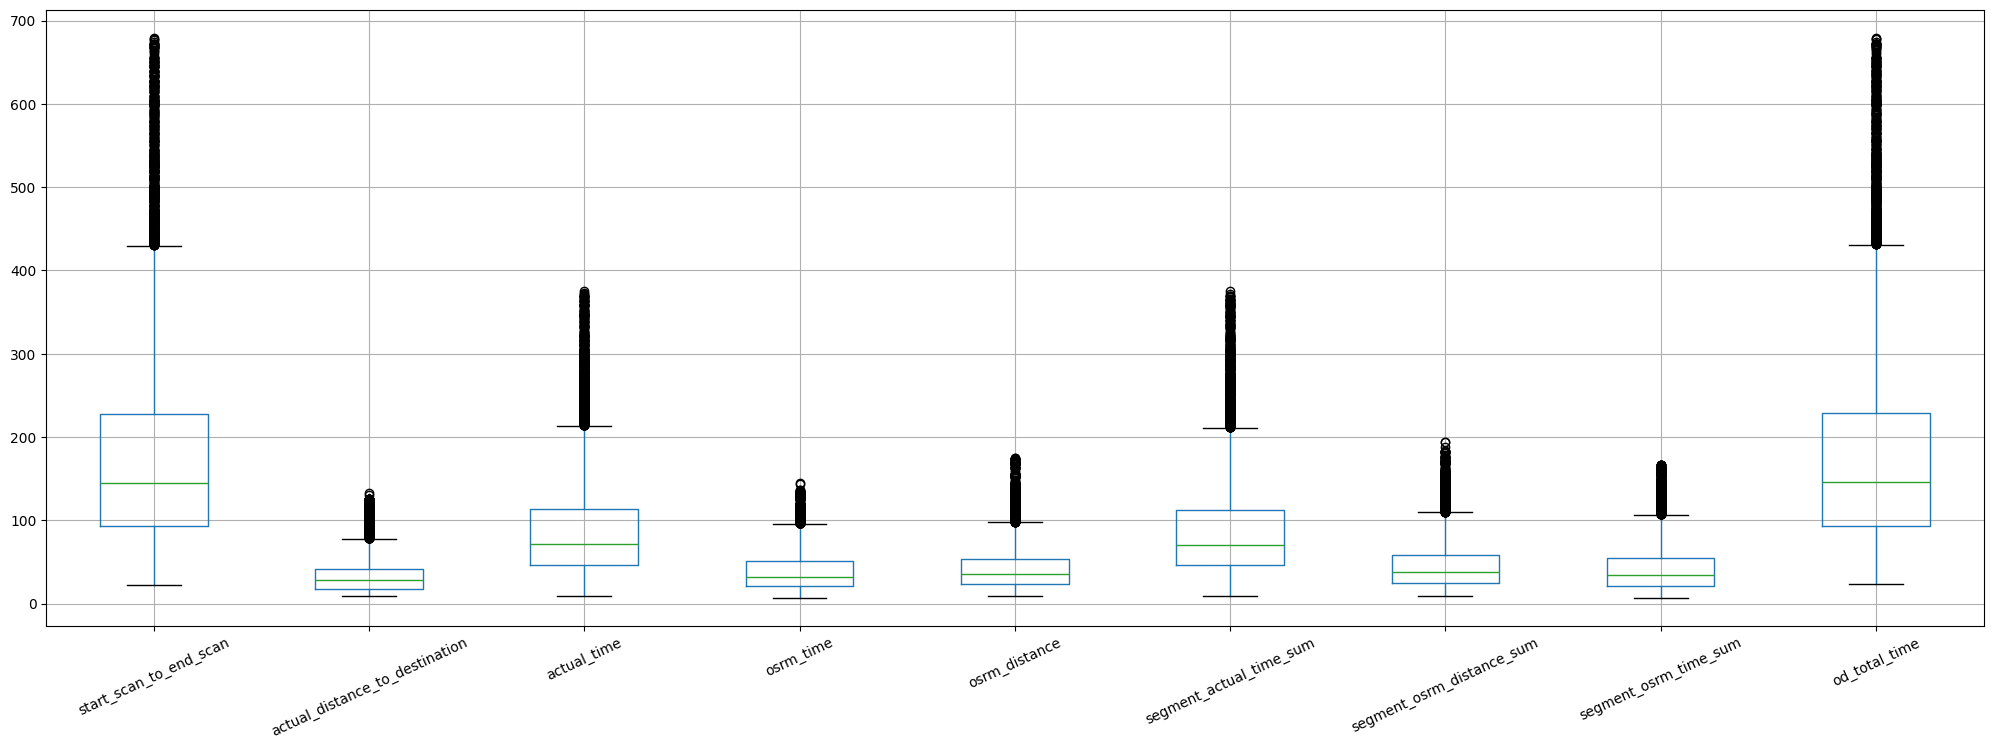

In [163]:
df2[num_cols].boxplot(rot=25,figsize=(25,8))

In [164]:
df2.describe()

,trip_creation_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_total_time,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_week,trip_creation_hour
count,11785,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,11785.00000,11785.000000,11785,11785.000000,11785.000000,11785.0,11785.000000,11785.000000
mean,2018-09-22 13:50:07.609835776,177.901825,33.861664,89.533478,38.726009,43.675293,88.643951,46.524437,41.94128,178.404915,2018-09-22 00:52:03.156555008,18.362834,9.122444,2018.0,38.303012,12.459567
min,2018-09-12 00:00:22.886430,22.000000,9.002461,9.000000,7.000000,9.072900,9.000000,9.072900,7.00000,23.000000,2018-09-12 00:00:00,1.000000,9.000000,2018.0,37.000000,0.000000
25%,2018-09-17 03:20:51.775845888,93.000000,17.440687,46.000000,21.000000,23.507200,46.000000,24.268101,21.00000,93.520000,2018-09-17 00:00:00,14.000000,9.000000,2018.0,38.000000,4.000000
50%,2018-09-22 05:09:26.866429952,145.000000,27.669827,71.000000,32.000000,35.440498,70.000000,37.344700,34.00000,145.610000,2018-09-22 00:00:00,19.000000,9.000000,2018.0,38.000000,15.000000
75%,2018-09-27 21:28:04.029539072,228.000000,41.679256,113.000000,51.000000,53.269600,112.000000,58.489502,55.00000,228.580000,2018-09-27 00:00:00,25.000000,9.000000,2018.0,39.000000,20.000000
max,2018-10-03 23:59:42.701692,679.000000,132.454346,375.000000,145.000000,175.234100,375.000000,194.515594,166.00000,679.580000,2018-10-03 00:00:00,30.000000,10.000000,2018.0,40.000000,23.000000
std,NaN,118.565392,22.634089,61.430145,23.660843,29.399841,61.043976,31.761202,27.82221,118.567211,NaN,7.942098,0.327812,0.0,0.970410,8.116676


In [165]:
df2.describe(include=object)

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,source_state,source_city,source_place,destination_state,destination_city,destination_place
count,11785,11785,11785,11785,11785,11785,11785,11785,11785,11785,11785,11785
unique,1277,11785,854,854,978,978,28,622,693,31,759,805
top,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,trip-153671042288605164,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Maharashtra,Mumbai,unknow_place,Maharashtra,Mumbai,unknow_place
freq,53,1,532,532,371,371,2276,1405,638,2261,1514,750


**Post Aggregation and Outlier Treatment**

INSIGHT:unique trip id=12526

Unique Source states 30 and Cities 1121

Unique Destination states 32 and Cities 1165

Mean Actual distance to Destination is 36.53 with maximum at 131.29 and minimum at 9

Average Actual time is 87.27 with minimum at 9 and maximum at 339

**One-Hot Encoding on Categorical Features**

In [166]:
df3=df2.copy()

In [167]:
#apply one hot encoding
one_hot_encoded = pd.get_dummies(df3['route_type'],prefix='Category')
#concating one hot encoding column

df_encoded=pd.concat([df3,one_hot_encoded],axis=1)

df_encoded[['Category_Carting','Category_FTL']] = df_encoded[['Category_Carting','Category_FTL']].astype(int)



In [168]:
df_encoded.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,destination_city,destination_place,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_week,trip_creation_hour,Category_Carting,Category_FTL
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),58.0,...,Doddablpur,ChikaDPP_D,2018-09-12,12,9,2018,37,0,1,0
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,...,Mumbai,MiraRd_IP,2018-09-12,12,9,2018,37,0,1,0
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),152.0,...,Sandur,WrdN1DPP_D,2018-09-12,12,9,2018,37,0,0,1
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),60.0,...,Chennai,Poonamallee,2018-09-12,12,9,2018,37,0,1,0
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),98.0,...,Chennai,Vandalur_Dc,2018-09-12,12,9,2018,37,0,1,0


Normalize/ Standardize the numerical features using MinMaxScaler

In [169]:
from sklearn.preprocessing import MinMaxScaler

In [170]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11785 entries, 0 to 11784
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            11785 non-null  category      
 1   trip_creation_time              11785 non-null  datetime64[ns]
 2   route_schedule_uuid             11785 non-null  object        
 3   route_type                      11785 non-null  category      
 4   trip_uuid                       11785 non-null  object        
 5   source_center                   11785 non-null  object        
 6   source_name                     11785 non-null  object        
 7   destination_center              11785 non-null  object        
 8   destination_name                11785 non-null  object        
 9   start_scan_to_end_scan          11785 non-null  float32       
 10  actual_distance_to_destination  11785 non-null  float32       
 11  ac

In [171]:
num_cols=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum','segment_osrm_time_sum','od_total_time' ]

In [172]:
scaler=MinMaxScaler()

In [173]:
scaler.fit(df3[num_cols])

MinMaxScaler()

In [174]:
df3[num_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_total_time
count,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,11785.000000,11785.00000,11785.000000
mean,177.901825,33.861664,89.533478,38.726009,43.675293,88.643951,46.524437,41.94128,178.404915
std,118.565392,22.634089,61.430145,23.660843,29.399841,61.043976,31.761202,27.82221,118.567211
min,22.000000,9.002461,9.000000,7.000000,9.072900,9.000000,9.072900,7.00000,23.000000
25%,93.000000,17.440687,46.000000,21.000000,23.507200,46.000000,24.268101,21.00000,93.520000
50%,145.000000,27.669827,71.000000,32.000000,35.440498,70.000000,37.344700,34.00000,145.610000
75%,228.000000,41.679256,113.000000,51.000000,53.269600,112.000000,58.489502,55.00000,228.580000
max,679.000000,132.454346,375.000000,145.000000,175.234100,375.000000,194.515594,166.00000,679.580000


**Distribution of Categorical and Continuous Variables**

<Axes: ylabel='count'>

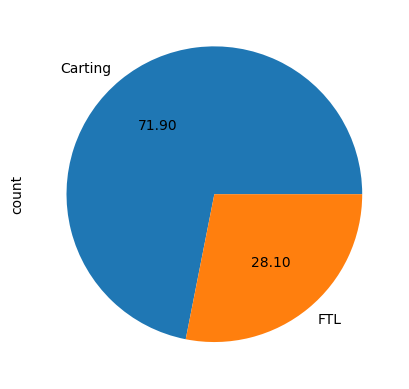

In [175]:
df2['route_type'].value_counts().plot(kind='pie',autopct="%.2f")

<Axes: ylabel='count'>

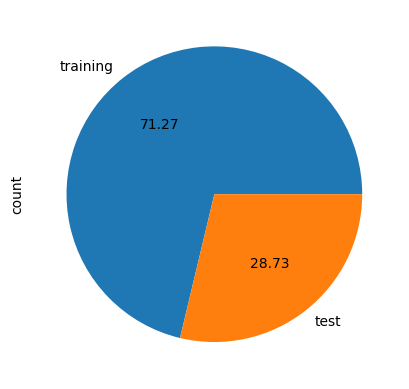

In [176]:
df2['data'].value_counts().plot(kind='pie',autopct="%.2f")

INSIGHTS:

Full Truck load is 28.10% of the total transportation and Carting is 71.90%
Test data is 28.73% and Training Data is 71.27% of the total data

**Trips based on time(hour)**

In [177]:
df2['trip_creation_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int8)

In [178]:
df_hour=df2.groupby(by='trip_creation_hour')['trip_uuid'].count().to_frame().reset_index()
df_hour.head()

,trip_creation_hour,trip_uuid
0,0,854
1,1,593
2,2,573
3,3,550
4,4,517


[]

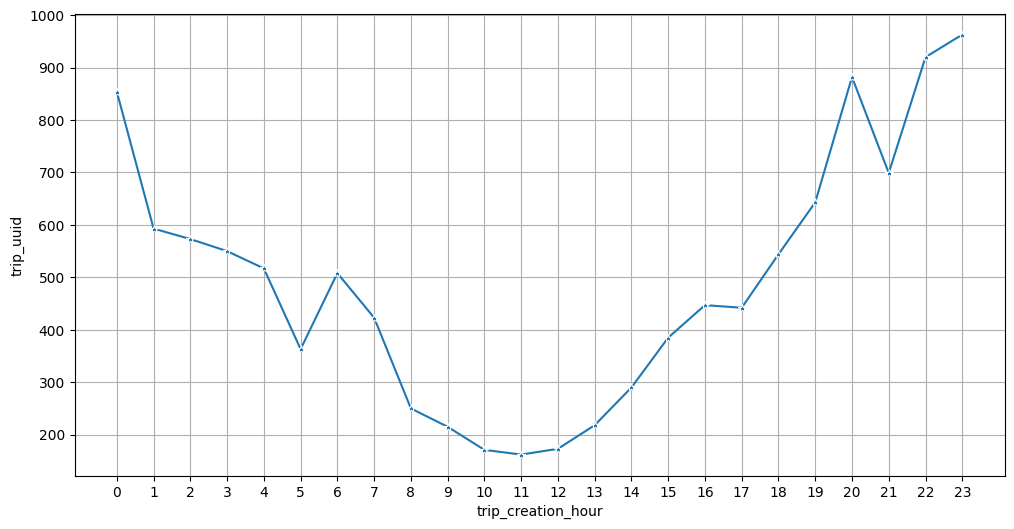

In [179]:
plt.figure(figsize=(12,6))
sns.lineplot(x='trip_creation_hour',y='trip_uuid',data=df_hour,marker='*')
plt.grid('both')
plt.xticks(np.arange(0,24))
plt.plot()

Insight:
Number of trips picks up at 11am and continues to go up till the end of the day

Number of trips in different days of month

In [180]:
df_day=df2['trip_creation_day'].value_counts().to_frame().reset_index()
df_day.head()

,trip_creation_day,count
0,18,633
1,15,629
2,13,601
3,12,597
4,21,587


[]

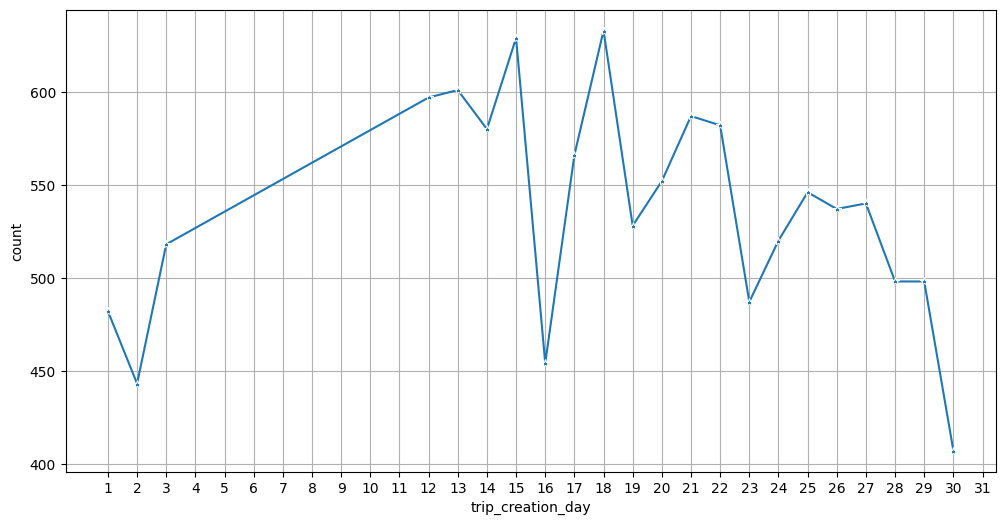

In [181]:
plt.figure(figsize=(12,6))
sns.lineplot(y='count',x='trip_creation_day',data=df_day,marker='*')
plt.grid('both')
plt.xticks(np.arange(1,32))
plt.plot()

Insight:
It is observed that most of trips occuring in mid of the month with some spikes both on positive and negative side

**Trips w.r.t week of the year**

In [182]:
df_week=df2['trip_creation_week'].value_counts().to_frame().reset_index()
df_week.head()

,trip_creation_week,count
0,38,3935
1,39,3546
2,37,2861
3,40,1443


[]

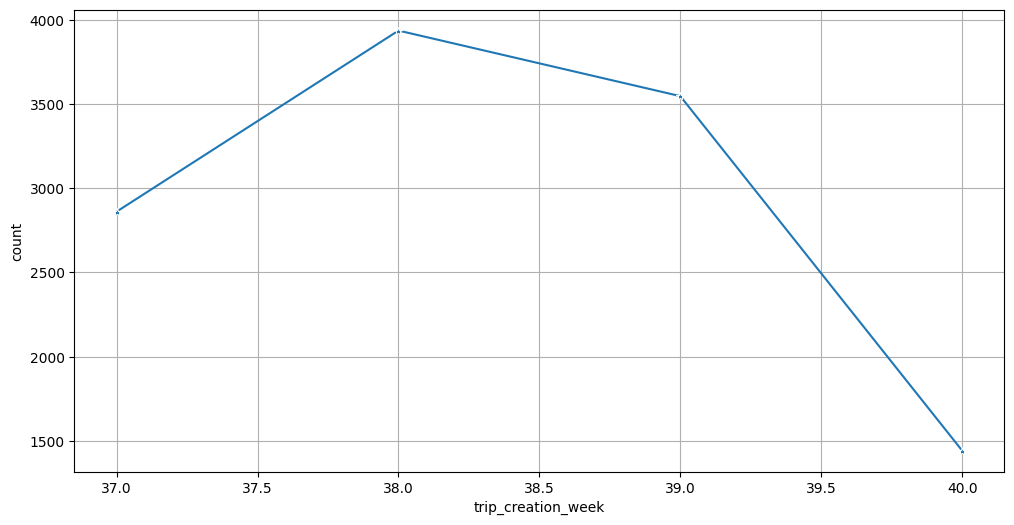

In [183]:
plt.figure(figsize=(12,6))
sns.lineplot(y='count',x='trip_creation_week',data=df_week,marker='*')
plt.grid('both')

plt.plot()

Insight:
Trip is at maximum in week 38

In [184]:
df_source_state = df2.groupby(by = 'source_state')['trip_uuid'].count().to_frame().reset_index()
df_source_state['perc'] = np.round(df_source_state['trip_uuid'] * 100/ df_source_state['trip_uuid'].sum(), 2)
df_source_state = df_source_state.sort_values(by = 'trip_uuid', ascending = False)
df_source_state.head()

,source_state,trip_uuid,perc
17,Maharashtra,2276,19.31
14,Karnataka,1973,16.74
10,Haryana,1090,9.25
23,Tamil Nadu,992,8.42
24,Telangana,647,5.49


[]

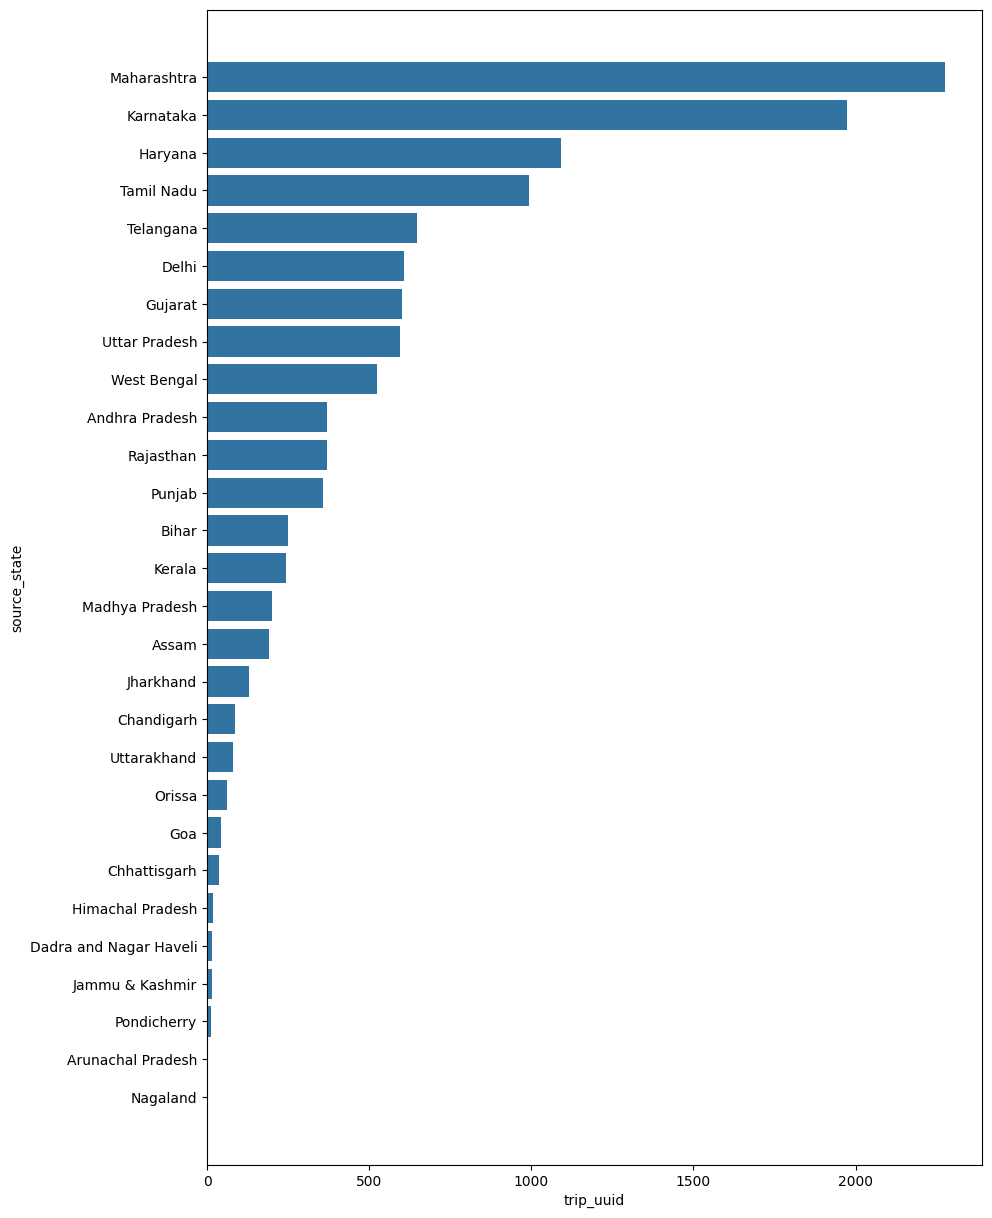

In [185]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_source_state,
            x = df_source_state['trip_uuid'],
            y = df_source_state['source_state'])
plt.plot()

INSIGHTS:

Maximum trips are from Maharshatra followed by Karnatka and Haryana

**Distribution of Trips from Different Cities**

In [186]:
df_source_city = df2.groupby(by = 'source_city')['trip_uuid'].count().to_frame().reset_index()
df_source_city['perc'] = np.round(df_source_city['trip_uuid'] * 100/ df_source_city['trip_uuid'].sum(), 2)
df_source_city = df_source_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_source_city

,source_city,trip_uuid,perc
394,Mumbai,1405,11.92
153,Delhi,727,6.17
72,Bengaluru,723,6.13
214,Gurgaon,565,4.79
51,Bangalore,555,4.71
122,Chennai,538,4.57
92,Bhiwandi,523,4.44
240,Hyderabad,412,3.50
467,Pune,315,2.67
321,Kolkata,249,2.11


[]

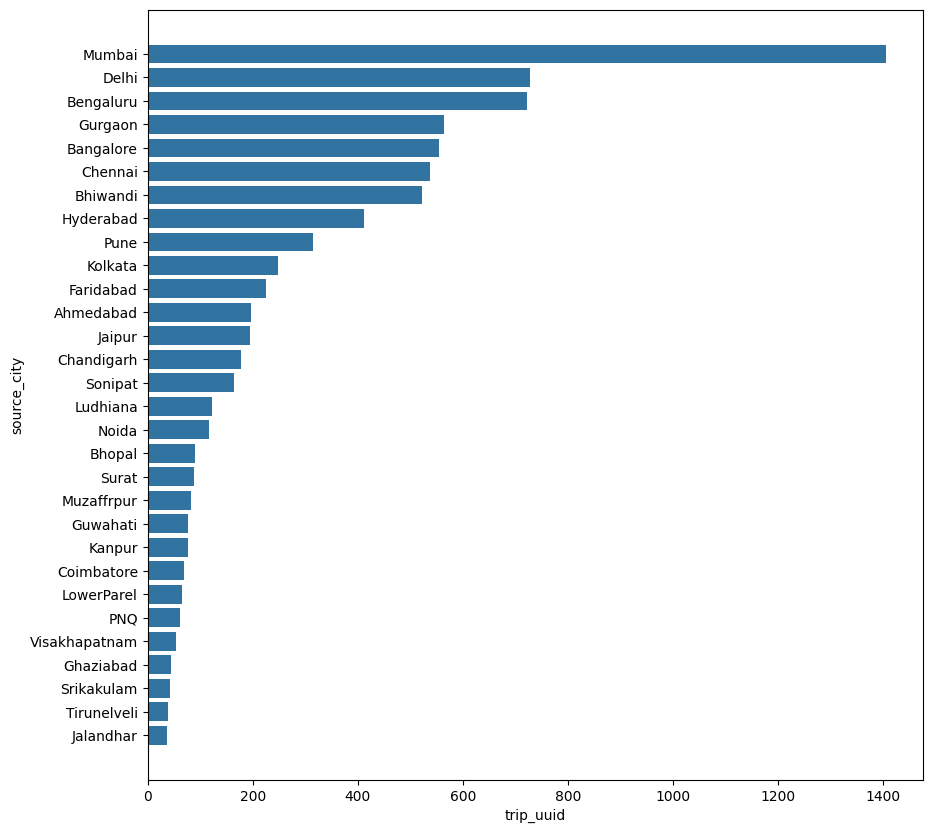

In [187]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_source_city,
            x = df_source_city['trip_uuid'],
            y = df_source_city['source_city'])
plt.plot()

INSIGHTS:

Maximum trips are from Mumbai followed by Delhi and Bengaluru

**Distribution of Trips in Destination States**

In [188]:
df_destination_state = df2.groupby(by = 'destination_state')['trip_uuid'].count().to_frame().reset_index()
df_destination_state['perc'] = np.round(df_destination_state['trip_uuid'] * 100/ df_destination_state['trip_uuid'].sum(), 2)
df_destination_state = df_destination_state.sort_values(by = 'trip_uuid', ascending = False)
df_destination_state.head()

,destination_state,trip_uuid,perc
18,Maharashtra,2261,19.19
15,Karnataka,1988,16.87
11,Haryana,1038,8.81
25,Tamil Nadu,1014,8.60
26,Telangana,645,5.47


[]

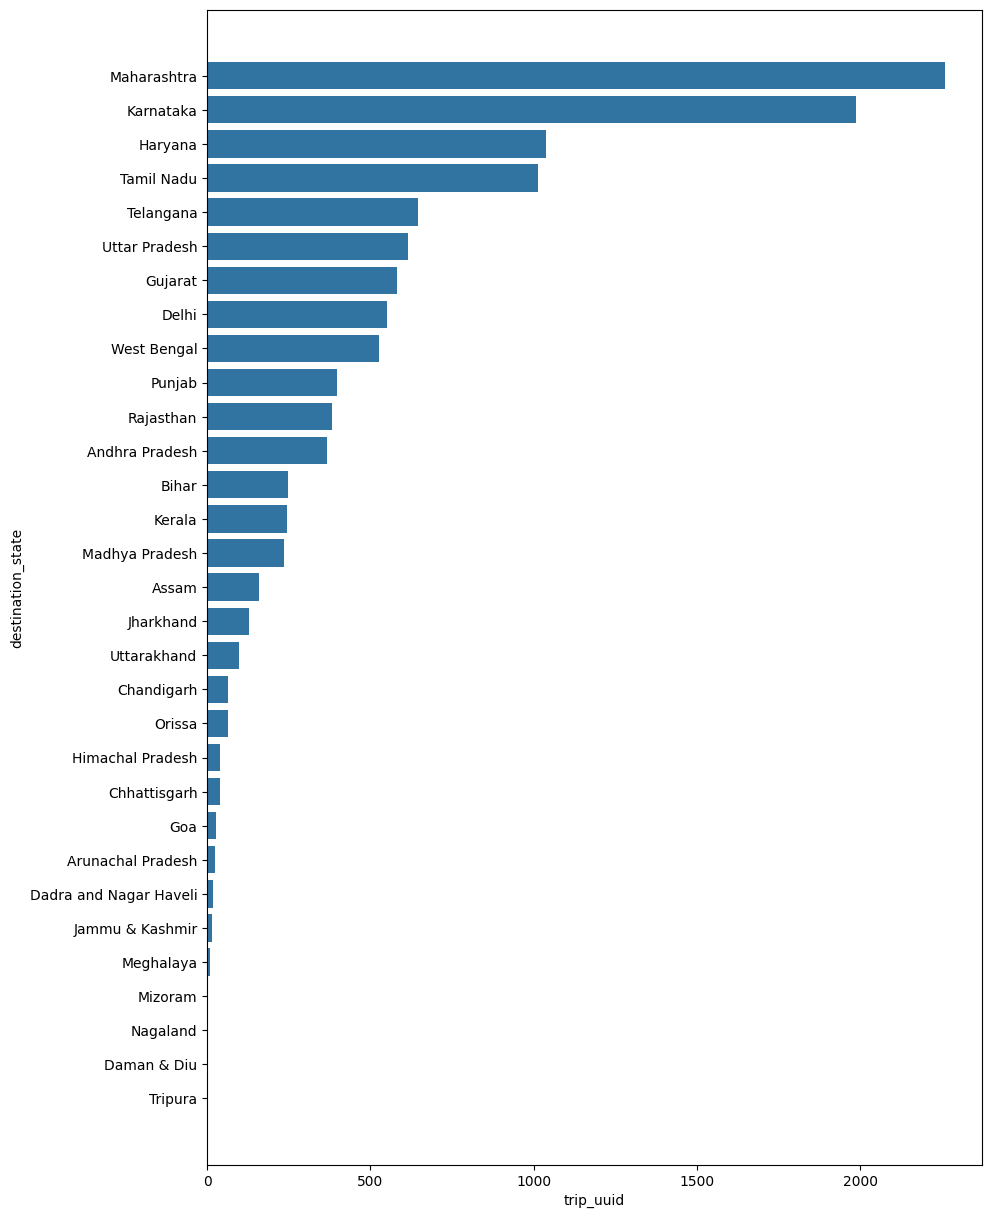

In [189]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_destination_state,
            x = df_destination_state['trip_uuid'],
            y = df_destination_state['destination_state'])
plt.plot()

INSIGHTS:

Maximum trips destination is Maharashatra followed by Karnatka, Haryana and TN. Which infers that these states are have got big consumption and big customer base w.r.t other states

Distribution of Trips in Destination Cities

In [190]:
df_destination_city = df2.groupby(by = 'destination_city')['trip_uuid'].count().to_frame().reset_index()
df_destination_city['perc'] = np.round(df_destination_city['trip_uuid'] * 100/ df_destination_city['trip_uuid'].sum(), 2)
df_destination_city = df_destination_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_destination_city

,destination_city,trip_uuid,perc
482,Mumbai,1514,12.85
91,Bengaluru,972,8.25
187,Delhi,648,5.50
152,Chennai,545,4.62
264,Gurgaon,486,4.12
288,Hyderabad,378,3.21
109,Bhiwandi,367,3.11
68,Bangalore,358,3.04
227,Faridabad,243,2.06
392,Kolkata,234,1.99


[]

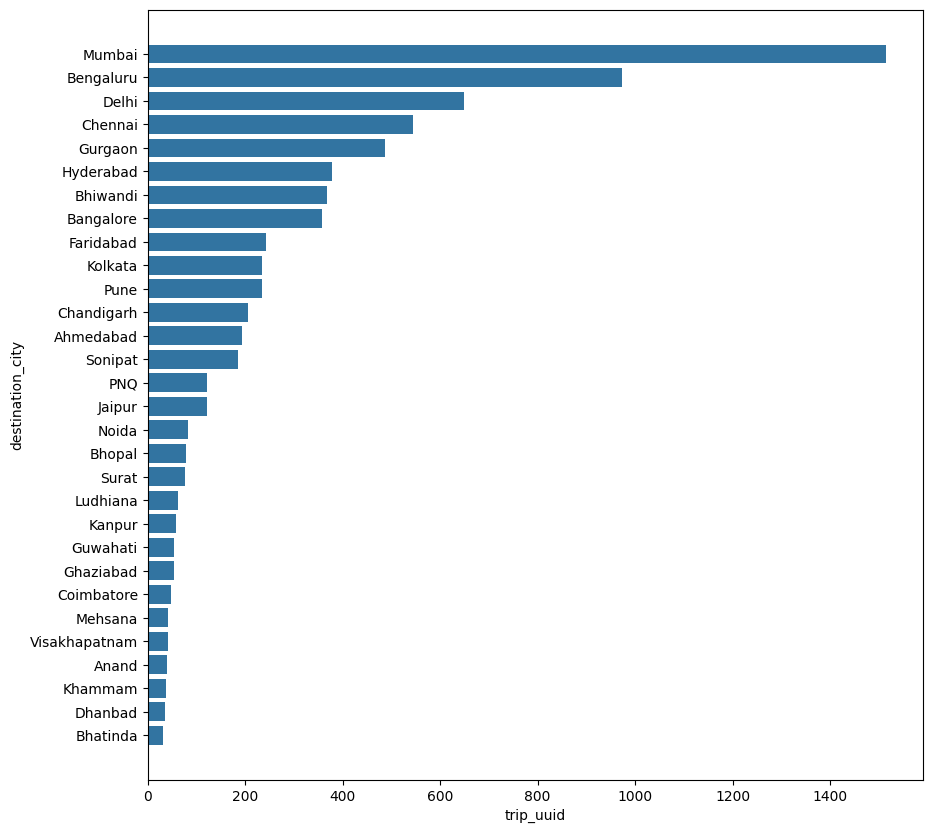

In [191]:

plt.figure(figsize = (10, 10))
sns.barplot(data = df_destination_city,
            x = df_destination_city['trip_uuid'],
            y = df_destination_city['destination_city'])
plt.plot()

INSIGHTS:

Maximum trips have got their destination cities as Mumbai followed by Bengaluru and Delhi which clearly infers number of orders from these cities is higher in comparison to other states

**Distribution of Continuous Variables**

<Axes: xlabel='od_total_time', ylabel='Count'>

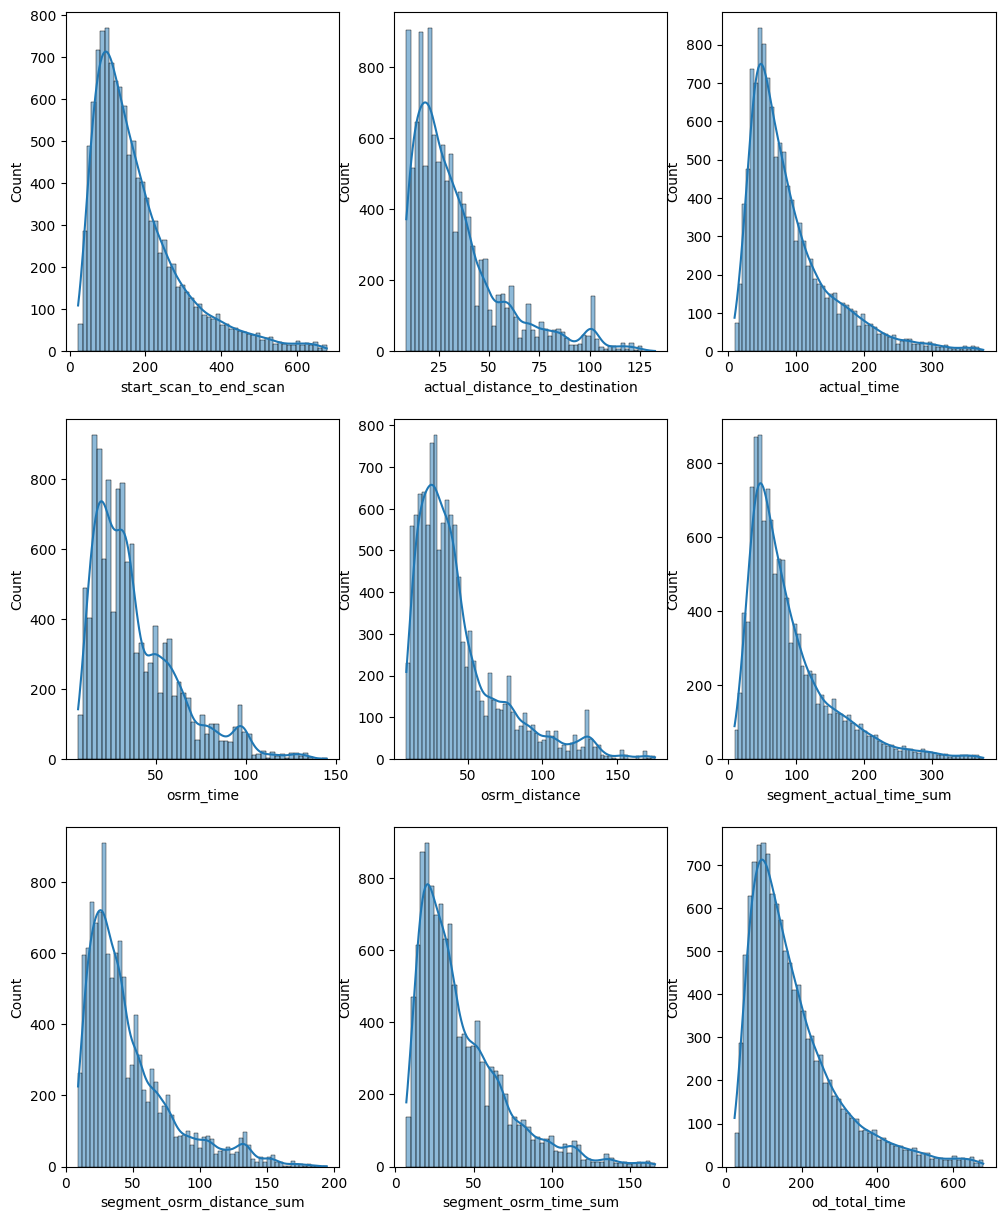

In [192]:

fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(12,15))
sns.histplot(data=df2,x='start_scan_to_end_scan',kde=True,ax=ax[0,0])
sns.histplot(data=df2,x='actual_distance_to_destination',kde=True,ax=ax[0,1])
sns.histplot(data=df2,x='actual_time',kde=True,ax=ax[0,2])
sns.histplot(data=df2,x='osrm_time',kde=True,ax=ax[1,0])
sns.histplot(data=df2,x='osrm_distance',kde=True,ax=ax[1,1])
sns.histplot(data=df2,x='segment_actual_time_sum',kde=True,ax=ax[1,2])
sns.histplot(data=df2,x='segment_osrm_distance_sum',kde=True,ax=ax[2,0])
sns.histplot(data=df2,x='segment_osrm_time_sum',kde=True,ax=ax[2,1])
sns.histplot(data=df2,x='od_total_time',kde=True,ax=ax[2,2])

INSIGHTS:

All the continuous variables are right skewed
Most of the trips are short timed or short distanced
As the time and distance increases , number of trips decreases

In [193]:
df_corr = df2[num_cols].corr()
df_corr


,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_total_time
start_scan_to_end_scan,1.000000,0.340936,0.386646,0.339608,0.340655,0.386298,0.351050,0.338673,0.999997
actual_distance_to_destination,0.340936,1.000000,0.688048,0.904911,0.958754,0.684097,0.927938,0.855288,0.340935
actual_time,0.386646,0.688048,1.000000,0.695645,0.709287,0.999902,0.712635,0.684188,0.386645
osrm_time,0.339608,0.904911,0.695645,1.000000,0.953447,0.691703,0.933041,0.950337,0.339612
osrm_distance,0.340655,0.958754,0.709287,0.953447,1.000000,0.705654,0.962641,0.908468,0.340662
segment_actual_time_sum,0.386298,0.684097,0.999902,0.691703,0.705654,1.000000,0.708870,0.680319,0.386296
segment_osrm_distance_sum,0.351050,0.927938,0.712635,0.933041,0.962641,0.708870,1.000000,0.949356,0.351046
segment_osrm_time_sum,0.338673,0.855288,0.684188,0.950337,0.908468,0.680319,0.949356,1.000000,0.338677
od_total_time,0.999997,0.340935,0.386645,0.339612,0.340662,0.386296,0.351046,0.338677,1.000000


[]

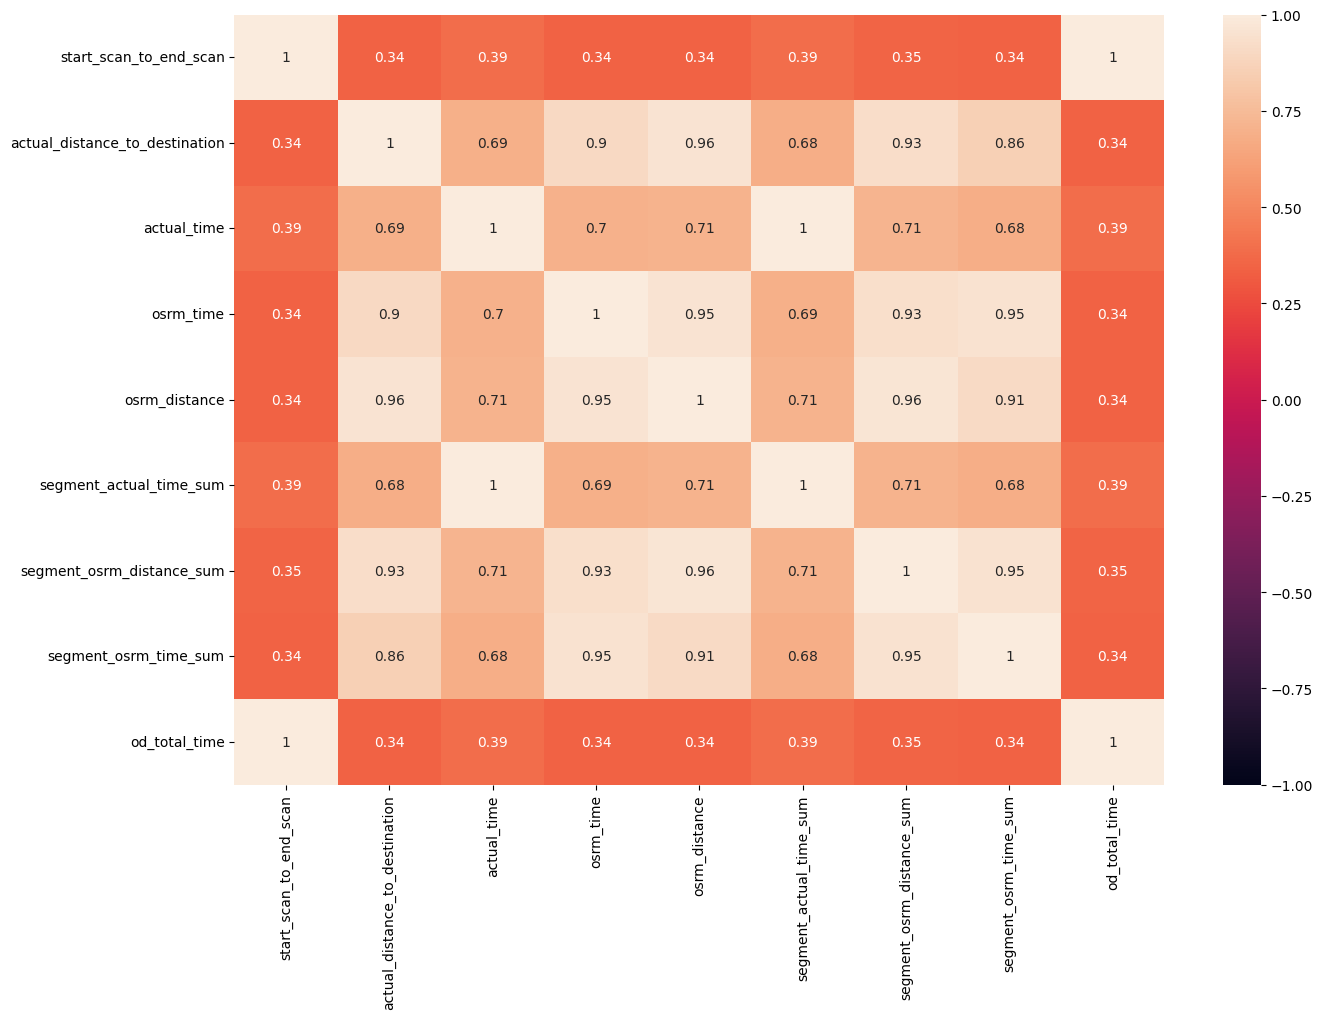

In [194]:

plt.figure(figsize = (15, 10))
sns.heatmap(data = df_corr, vmin = -1, vmax = 1, annot = True)
plt.plot()

**Hypothesis Testing**

STEP-1 : Set up Null Hypothesis

Null Hypothesis ( H0 ) - There is no significant difference between actual_time and osrm_time

Alternate Hypothesis ( HA ) - There is significant difference between actual_time and osrm_time

STEP-2 : Checking for Test Statistics

Independent T-Test if assumptions are met else Mann-Whitney U Test

STEP-3: Setting Significance level to 5% , alpha = 0.05

STEP-4: Compute Test Statistics and P-Value.

STEP-5: Compare P-Value to Significance level

Based on p-value, we will accept or reject H0

p-val > alpha : Fail to reject H0

p-val < alpha : Reject H0

actual_time aggregated value and OSRM time aggregated value

INSIGHTS:

Actual Distance to Destination is highly correlated osrm time , osrm distance
osrm time is highly correlated to osrm distance and actual distance to destination
osrm distance is highly correlated to osrm time and actual distance to destination

In [195]:
df2[['actual_time','osrm_time']].describe()

,actual_time,osrm_time
count,11785.000000,11785.000000
mean,89.533478,38.726009
std,61.430145,23.660843
min,9.000000,7.000000
25%,46.000000,21.000000
50%,71.000000,32.000000
75%,113.000000,51.000000
max,375.000000,145.000000


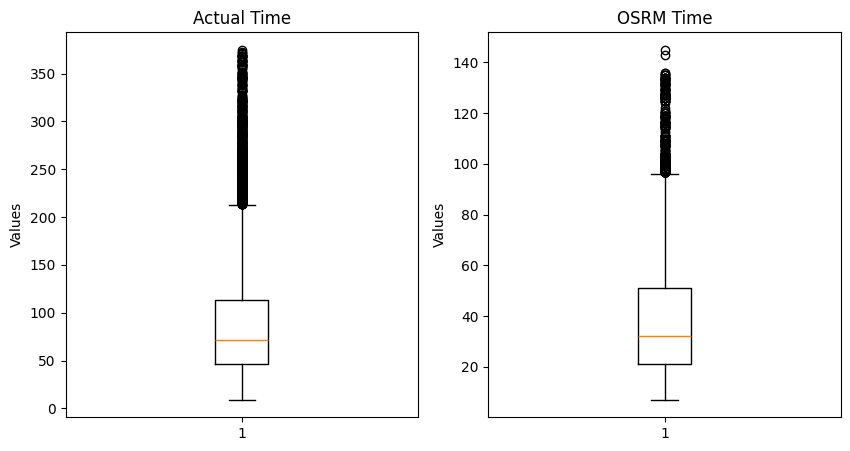

In [196]:
fig,axs=plt.subplots(1,2,figsize=(10,5))
#plotting box plots

axs[0].boxplot(df2['actual_time'])
axs[0].set_title('Actual Time')
axs[1].boxplot(df2['osrm_time'])
axs[1].set_title('OSRM Time')

# Adding labels
for ax in axs:
    ax.set_ylabel('Values')

plt.show()

checking whether it follows normal distribution


[]

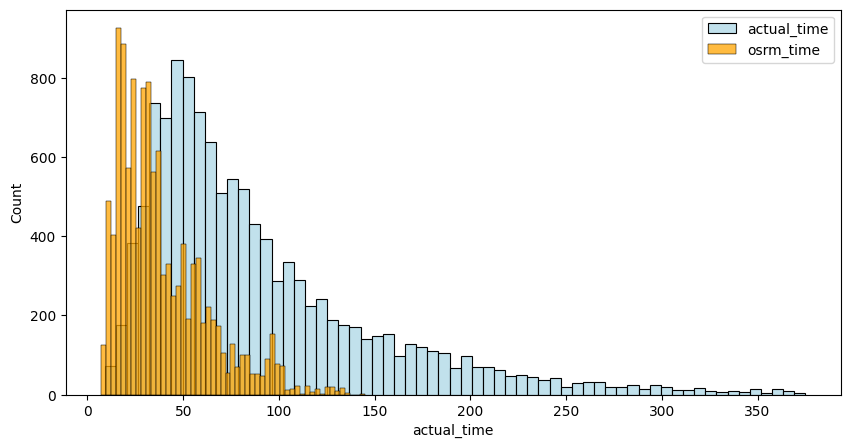

In [197]:
plt.figure(figsize=(10,5))
sns.histplot(df2['actual_time'],color='lightblue')
sns.histplot(df2['osrm_time'],color='orange')
plt.legend(['actual_time', 'osrm_time'])
plt.plot()

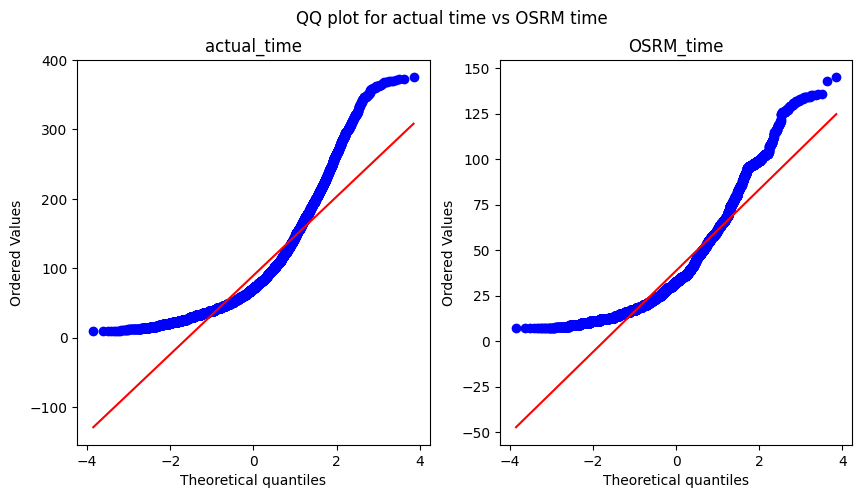

In [198]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.suptitle('QQ plot for actual time vs OSRM time')
spy.probplot(df2['actual_time'], dist="norm", plot=plt)
plt.title('actual_time')
plt.subplot(1,2,2)
spy.probplot(df2['osrm_time'], dist="norm", plot=plt)
plt.title('OSRM_time')
plt.show()


Its clear that both samples do not follow normal distribution

Shapiro Wilk Test for Normality

H0 : The sample follows normal distribution
H1 : The sample does not follow normal distribution

aplha=0.05

In [199]:
test_stat, p_value = spy.shapiro(df2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.621822173463174e-56
The sample does not follow normal distribution


In [200]:
test_stat, p_value = spy.shapiro(df2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.7255792378778536e-52
The sample does not follow normal distribution


In [201]:
import warnings
warnings.simplefilter('ignore')

In [202]:
transformed_actual_time = spy.boxcox(df2['actual_time'])[0]

test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.595825302663397e-16
The sample does not follow normal distribution


In [203]:
transformed_osrm_time = spy.boxcox(df2['osrm_time'])[0]

test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.030645616373311e-25
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "actual_time" and "osrm_time" columns, the distributions do not follow normal distribution.

In [204]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.0
The samples do not have  Homogenous Variance


Since the samples do not follow any of above assumptions, so T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [205]:

test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.0
The samples are not similar


INSIGHT:

Actual Time and OSRM Time are not similar which clearly infers that actual time taken to complete the delivery is not matching the expected time lines

**OSRM_TIME AGGREGATED VALUE AND SEGMENT OSRM TIME AGGREGATED VALUE**

In [206]:
df2[['actual_time', 'segment_actual_time_sum']].describe().T

,count,mean,std,min,25%,50%,75%,max
actual_time,11785.0,89.533478,61.430145,9.0,46.0,71.0,113.0,375.0
segment_actual_time_sum,11785.0,88.643951,61.043976,9.0,46.0,70.0,112.0,375.0


checking to see if it follows normal distribution

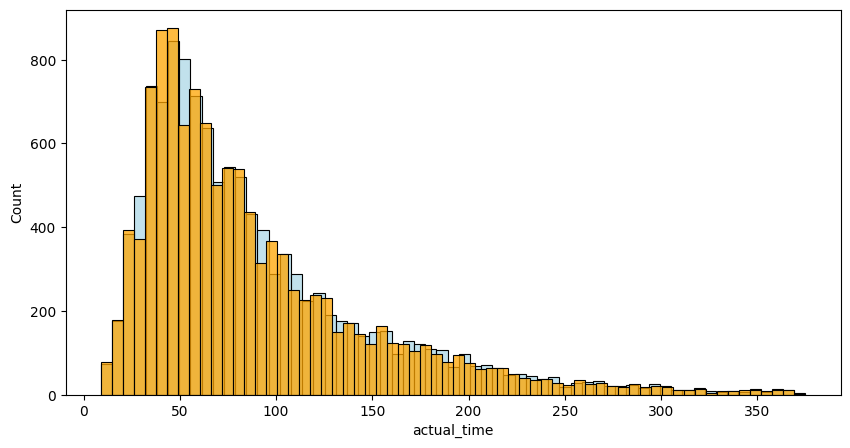

In [207]:
plt.figure(figsize=(10,5))
sns.histplot(df2['actual_time'],color='lightblue')
sns.histplot(df2['segment_actual_time_sum'],color='orange')
plt.show()

checking with QQ plot

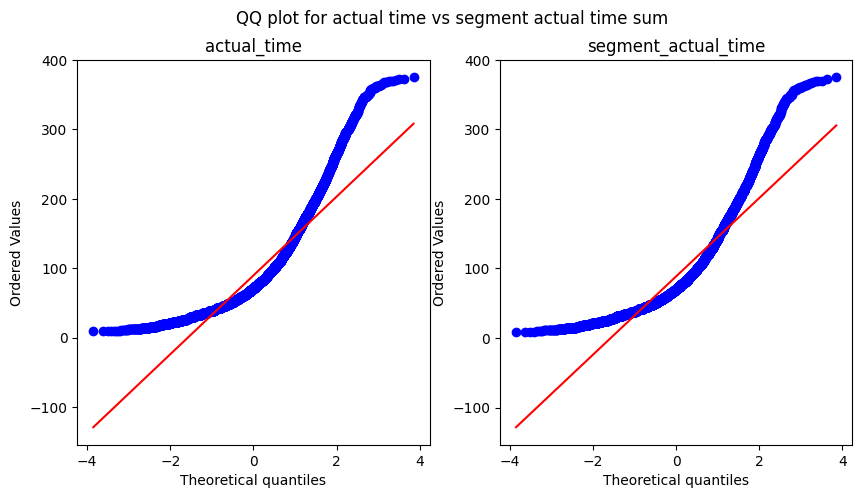

In [208]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.suptitle('QQ plot for actual time vs segment actual time sum')
spy.probplot(df2['actual_time'], dist="norm", plot=plt)
plt.title('actual_time')
plt.subplot(1,2,2)
spy.probplot(df2['segment_actual_time_sum'], dist="norm", plot=plt)
plt.title('segment_actual_time')
plt.show()

From Above plots its clear that samples do not follow Normal Distribution

Applying Shapiro-Wilk test for normality

H0 : The sample follows normal distribution H1 : The sample does not follow normal distribution

alpha = 0.05

In [209]:
test_value, p_value = spy.shapiro(df2['actual_time'].sample(5000))
print(p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

5.718076167765885e-56
The sample does not follow normal distribution


In [210]:
test_value, p_value = spy.shapiro(df2['segment_actual_time_sum'].sample(5000))
print(p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

3.193268181608542e-56
The sample does not follow normal distribution


The sample does not follow normal distribution

**Transforming the data using boxcox transformation to check if the transformed data follows normal distribution**

In [211]:
transformed_actual_time = spy.boxcox(df2['actual_time'])[0]
test_value,p_value=spy.shapiro(transformed_actual_time)
print(p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

5.595825302663397e-16
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "osrm_time" and "segment_osrm_time" columns, the distributions do not follow normal distribution.

Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [212]:
test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['segment_actual_time_sum'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.18510898911913976
The samples are similar 


INSIGHT:

Actual_time is  similar to the Segment Actual Time aggregate

**OSRM DISTANCE AGGREGATED VALUE AND SEGMENT OSRM DISTANCE AGGREGATED VALUE**

In [213]:
  df2[['osrm_distance', 'segment_osrm_distance_sum']].describe()

,osrm_distance,segment_osrm_distance_sum
count,11785.000000,11785.000000
mean,43.675293,46.524437
std,29.399841,31.761202
min,9.072900,9.072900
25%,23.507200,24.268101
50%,35.440498,37.344700
75%,53.269600,58.489502
max,175.234100,194.515594


Visual Tests to know if the samples follow normal distribution

[]

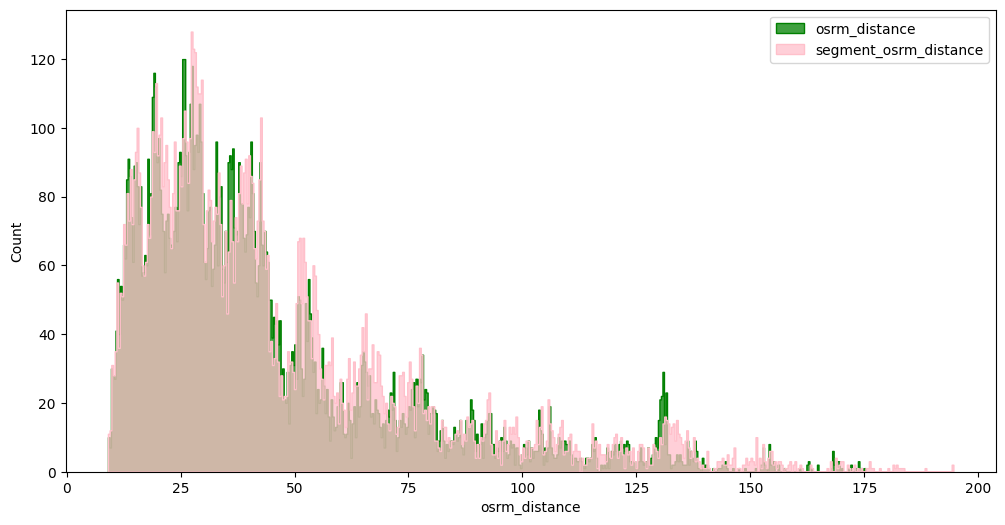

In [214]:
plt.figure(figsize = (12, 6))
sns.histplot(df2['osrm_distance'], element = 'step', color = 'green', bins = 500)
sns.histplot(df2['segment_osrm_distance_sum'], element = 'step', color = 'pink', bins = 500)
plt.legend(['osrm_distance', 'segment_osrm_distance'])
plt.plot()


Distribution check using QQ Plot

[]

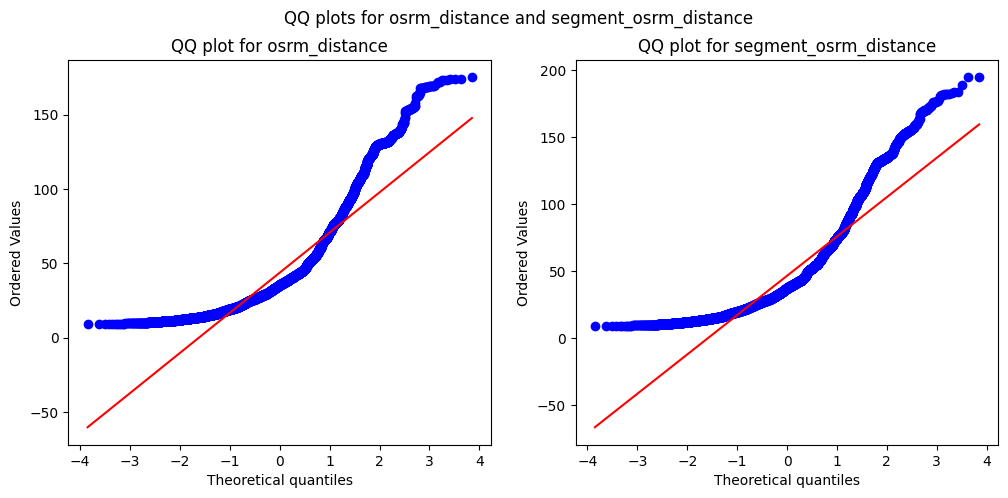

In [215]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
spy.probplot(df2['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_osrm_distance_sum'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.plot()


It can be seen from the above plots that the samples do not follow normal distribution.

Applying Shapiro-Wilk test for normality

H0 : The sample follows normal distribution H1 : The sample does not follow normal distribution

alpha = 0.05

In [216]:

test_stat, p_value = spy.shapiro(df2['osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.011108240230236e-57
The sample does not follow normal distribution


In [217]:
test_stat, p_value = spy.shapiro(df2['segment_osrm_distance_sum'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.867121074236399e-57
The sample does not follow normal distribution


Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [218]:
transformed_osrm_distance = spy.boxcox(df2['osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.370628757533464e-26
The sample does not follow normal distribution


In [219]:
transformed_segment_osrm_distance = spy.boxcox(df2['segment_osrm_distance_sum'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.189057802140905e-26
The sample does not follow normal distribution


p-value 1.8357009882655104e-43
The sample does not follow normal distribution
Even after applying the boxcox transformation on each of the "osrm_distance" and "segment_osrm_distance" columns, the distributions do not follow normal distribution.

Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [220]:
test_stat, p_value = spy.mannwhitneyu(df2['osrm_distance'], df2['segment_osrm_distance_sum'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 1.6216982151805703e-10
The samples are not similar


INSIGHT:

It is concluded that osrm_distance and segment_osrm_distance are not similar.

**Recommendations**


Route Optimization: Utilize data insights to optimize delivery routes, reducing transit time and operational costs. By analyzing historical delivery data and traffic patterns, we can identify efficient routes that minimize distance and maximize delivery efficiency.

Demand Forecasting: Develop advanced forecasting models using historical delivery data to predict future demand accurately. By understanding demand patterns, we can optimize inventory management, allocate resources effectively, and ensure timely deliveries to customers.

Customer Segmentation: Analyze customer data to segment customers based on their preferences, order frequency, and location. By understanding customer segments, we can personalize marketing efforts, tailor services to meet specific needs, and enhance overall customer satisfaction.

Performance Metrics Tracking: Implement robust performance tracking mechanisms to monitor key performance indicators (KPIs) such as on-time delivery rate, order accuracy, and customer feedback. By closely monitoring KPIs, we can identify areas for improvement, address operational inefficiencies, and enhance service quality.

Predictive Maintenance: Utilize predictive analytics to anticipate maintenance needs for delivery vehicles and equipment. By analyzing historical maintenance data and equipment performance metrics, we can identify potential issues before they occur, minimize downtime, and optimize maintenance schedules.

Fraud Detection: Implement fraud detection algorithms to identify and prevent fraudulent activities such as package theft or unauthorized transactions. By analyzing transactional data and identifying suspicious patterns, we can safeguard the integrity of our delivery network and protect our customers' interests.

Supply Chain Optimization: Analyze supply chain data to identify bottlenecks, optimize inventory levels, and streamline procurement processes. By optimizing the supply chain, we can reduce lead times, minimize stockouts, and improve overall operational efficiency.

Market Expansion Strategies: Use data analytics to identify growth opportunities in new markets or segments. By analyzing market trends, competitor activities, and customer preferences, we can develop targeted expansion strategies to penetrate new markets and drive business growth.

Customer Experience Enhancement: Analyze customer feedback and sentiment data to identify areas for improvement in the delivery experience. By addressing customer pain points and enhancing service quality, we can increase customer loyalty, retention, and advocacy.

Continuous Improvement Culture: Foster a culture of continuous improvement by promoting data-driven decision-making and knowledge sharing across teams. By empowering employees with data insights and encouraging experimentation, we can drive innovation, agility, and resilience in our operations.